In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # It's a pretty style

In [60]:
# Importing CO2 and GDP datasets
CO2 = pd.read_csv("CO2_emissions.csv").iloc[:,1:]
GDP = pd.read_csv("GDP_worldwide.csv").iloc[:,1:]

In [61]:
top_15_countries = ["United States","China","Japan","Germany","United Kingdom","India","France","Italy","Canada","South Korea",
                    "Russia","Brazil","Australia","Spain","Indonesia", "Russian Federation", "Korea, Rep."]


# Choosing Year 2019 because that's the most frequent data with less missing values              
CO2_frame = CO2[CO2["Country Name"].isin(top_15_countries)][["Country Name", "2019.0"]]
GDP_frame = GDP[GDP["Country Name"].isin(top_15_countries)][["Country Name", "2019.0"]]

In [62]:
# Merging CO2 and GDP Dataframes
df = pd.merge(CO2_frame, GDP_frame, on ="Country Name").rename(columns = {'2019.0_x':'CO2 (2019)', '2019.0_y':'GDP (2019)'})
df

,Country Name,CO2 (2019),GDP (2019)
0,Australia,3.865300e+05,1.391953e+12
1,Brazil,4.343000e+05,1.873288e+12
2,Canada,5.802100e+05,1.742015e+12
3,China,1.070722e+07,1.427994e+13
4,Germany,6.574000e+05,3.888327e+12
5,Spain,2.399800e+05,1.393046e+12
6,France,3.005200e+05,2.728870e+12
7,United Kingdom,3.489200e+05,2.878674e+12
8,Indonesia,6.198400e+05,1.119100e+12
9,India,2.456300e+06,2.831552e+12


In [63]:
# Simple Correlation among CO2 and GDP
corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap='RdYlGn')

,CO2 (2019),GDP (2019)
CO2 (2019),1.000000,0.764470
GDP (2019),0.764470,1.000000


### **Positive Correlation exists among CO2 Emissions and GDP**

Text(0.5, 1.0, 'Correlation Matrix')

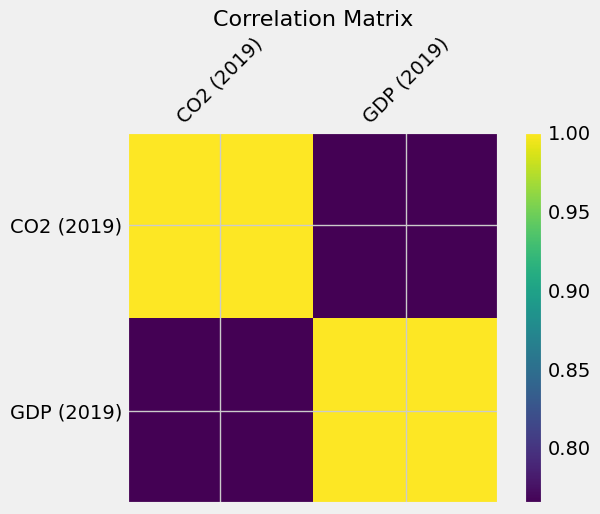

In [64]:
# Correlation Graph for Better Visuals
f = plt.figure()
plt.matshow(df.corr(numeric_only = True), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [66]:
# Scaling Data so we can see some Pattern 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:,1:])

df[["CO2 (Scaled)", "GDP (Scaled)"]] = df_scaled
df

,Country Name,CO2 (2019),GDP (2019),CO2 (Scaled),GDP (Scaled)
0,Australia,3.865300e+05,1.391953e+12,-0.484377,-0.544754
1,Brazil,4.343000e+05,1.873288e+12,-0.466546,-0.457543
2,Canada,5.802100e+05,1.742015e+12,-0.412080,-0.481328
3,China,1.070722e+07,1.427994e+13,3.368168,1.790360
4,Germany,6.574000e+05,3.888327e+12,-0.383266,-0.092448
5,Spain,2.399800e+05,1.393046e+12,-0.539082,-0.544556
6,France,3.005200e+05,2.728870e+12,-0.516484,-0.302524
7,United Kingdom,3.489200e+05,2.878674e+12,-0.498417,-0.275382
8,Indonesia,6.198400e+05,1.119100e+12,-0.397287,-0.594191
9,India,2.456300e+06,2.831552e+12,0.288234,-0.283920


### **Relation among CO2 and GDP**

Text(0, 0.5, 'Scaled Axis')

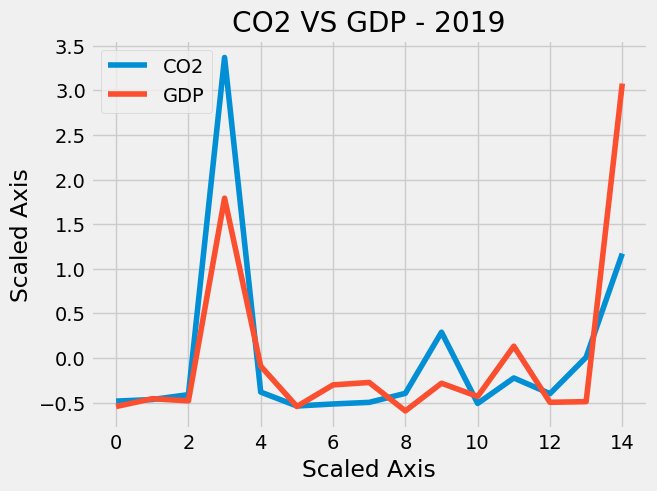

In [70]:
# There's a clear pattern between them that confims the correlation
plt.plot(df["CO2 (Scaled)"], label = "CO2")
plt.plot(df["GDP (Scaled)"], label = "GDP")

plt.legend()
plt.title('CO2 VS GDP - 2019')
plt.xlabel("Scaled Axis")
plt.ylabel("Scaled Axis")